In [1]:
%matplotlib inline
from stack_nlp import *

In [2]:
cfg = local_import("./default.py")

In [3]:
PrepareData(cfg)

Shape of question df (1696819, 21)
Shape of answer df (2028240, 21)


In [4]:
data = cfg.data

In [5]:
data.keys()

['meta', 'dict', 'features', 'answers']

In [6]:
qs = data["meta"];

In [7]:
qs.head()
print qs.shape

(673622, 37)


/usr/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


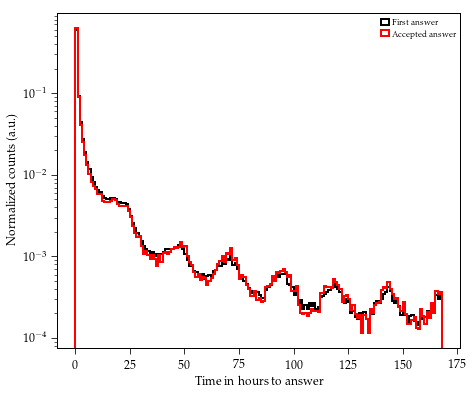

In [8]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Normalized counts (a.u.)")
plt.hist(qs.dt_answer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer", normed=True);
plt.hist(qs.dt_accanswer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer", normed=True);
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

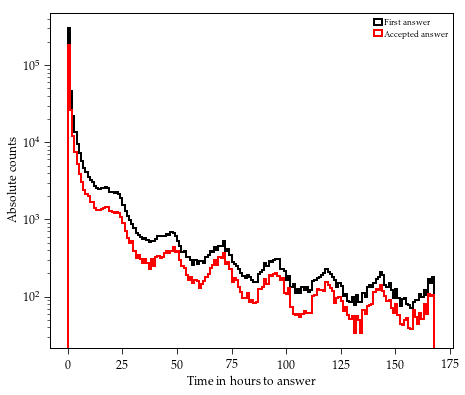

In [15]:
plt.figure(figsize=(8, 6))
plt.xlabel(r"Time in hours to answer")
plt.ylabel(r"Absolute counts")
plt.hist(qs.dt_answer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24, 
         histtype="step", lw=2, color="k", label="First answer");
plt.hist(qs.dt_accanswer.dt.total_seconds() * 1. / 3600, range=[0, 7 * 24], bins=7 * 24,
        histtype="step", lw=2, color="r", label="Accepted answer");
plt.semilogy(nonposy="clip")
plt.legend(loc="upper right");

[]

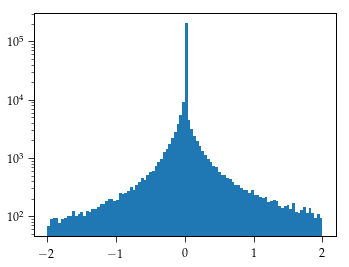

In [9]:
plt.hist((qs.dt_accanswer - qs.dt_answer).dt.total_seconds() * 1. / 3600, range=[-2, 2], bins=100);
plt.semilogy(nonposy="clip")

In [19]:
print np.sum(~qs.dt_answer.isnull())
print np.sum(~qs.dt_accanswer.isnull())

536044
307514


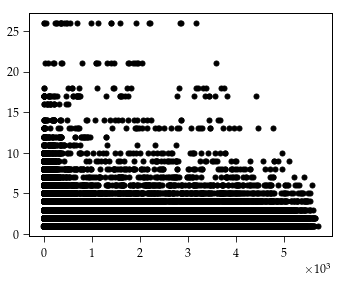

In [11]:
plt.plot(qs.dt_answer.dt.total_seconds() * 1. / 3600, qs.AnswerCount, "k.")

In [23]:
plt.subplots?

IndexError: index 2 is out of bounds for axis 0 with size 2

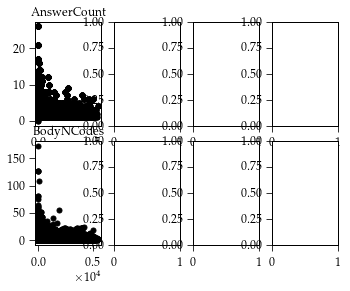

In [25]:
qs.columns
dthours = qs.dt_accanswer.dt.total_seconds() * 1. / 3600
# dthours = qs.dt_answer.dt.total_seconds() * 1. / 3600
cols = ["AnswerCount", "BodyNCodes", "BodyNQMarks", "BodySize", "titlelen", "nwords", "ordersum", "ratio"]
f, axarr = plt.subplots(2, 4, squeeze=False)
for i, col in enumerate(cols):
    axarr[i % 4, i // 4].plot(dthours, qs[col], "k.")
    axarr[i % 4, i // 4].set_title(col)
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
# plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
# plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)